#### Import libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Import Train and Test Dataset

In [26]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [27]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [28]:
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [29]:
df_train.shape


(31647, 18)

In [30]:
df_test.shape

(13564, 17)

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


#### Correlations between continous variables in train data

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text xticklabel objects>)

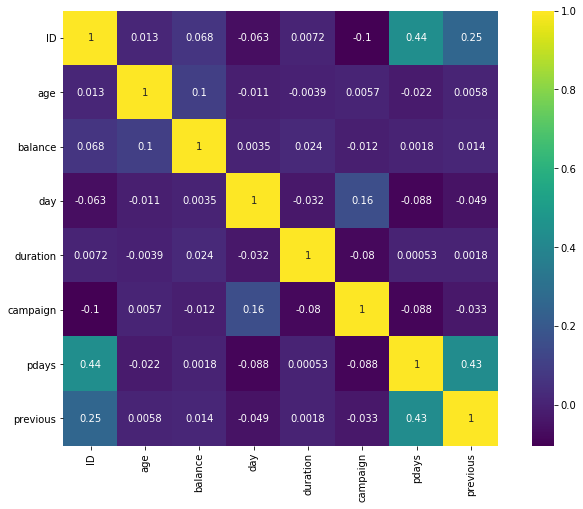

In [32]:
correlations=df_train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=correlations,square=True,annot = True,cmap="viridis")

plt.yticks(rotation=0)
plt.xticks(rotation=90)

#### Summarize train data

In [33]:
df_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [34]:
df_train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [35]:
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

#### Summarize test data

In [36]:
df_test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


#### Checking missing values in test data

In [37]:
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [38]:
#trial

#### Encoding categorical variables in training data

In [39]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [40]:
category_variables=['job','marital','education','default','housing','loan','contact','month','poutcome']
df_train_encoded=pd.get_dummies(df_train[category_variables])
df_train_encoded.shape

(31647, 44)

In [41]:
df_train_encoded.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [42]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   job_admin.           31647 non-null  uint8
 1   job_blue-collar      31647 non-null  uint8
 2   job_entrepreneur     31647 non-null  uint8
 3   job_housemaid        31647 non-null  uint8
 4   job_management       31647 non-null  uint8
 5   job_retired          31647 non-null  uint8
 6   job_self-employed    31647 non-null  uint8
 7   job_services         31647 non-null  uint8
 8   job_student          31647 non-null  uint8
 9   job_technician       31647 non-null  uint8
 10  job_unemployed       31647 non-null  uint8
 11  job_unknown          31647 non-null  uint8
 12  marital_divorced     31647 non-null  uint8
 13  marital_married      31647 non-null  uint8
 14  marital_single       31647 non-null  uint8
 15  education_primary    31647 non-null  uint8
 16  education_secondary  3

#### Replace categorical variables with dummy variables in training data

In [43]:
df=df_train.drop(['job','marital','education','default','housing','loan','contact','month','poutcome'],axis=1)
df=pd.concat([df,df_train_encoded],axis=1)

In [44]:
df.head()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,no,1,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,no,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,no,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,yes,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,no,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
df.dtypes

ID                      int64
age                     int64
balance                 int64
day                     int64
duration                int64
campaign                int64
pdays                   int64
previous                int64
subscribed             object
job_admin.              uint8
job_blue-collar         uint8
job_entrepreneur        uint8
job_housemaid           uint8
job_management          uint8
job_retired             uint8
job_self-employed       uint8
job_services            uint8
job_student             uint8
job_technician          uint8
job_unemployed          uint8
job_unknown             uint8
marital_divorced        uint8
marital_married         uint8
marital_single          uint8
education_primary       uint8
education_secondary     uint8
education_tertiary      uint8
education_unknown       uint8
default_no              uint8
default_yes             uint8
housing_no              uint8
housing_yes             uint8
loan_no                 uint8
loan_yes  

#### Encoding categorical variables in testing data

In [46]:
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [47]:
category_variables=['job','marital','education','default','housing','loan','contact','month','poutcome']
df_test_encoded=pd.get_dummies(df_test[category_variables])
df_test_encoded.shape

(13564, 44)

In [48]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   job_admin.           13564 non-null  uint8
 1   job_blue-collar      13564 non-null  uint8
 2   job_entrepreneur     13564 non-null  uint8
 3   job_housemaid        13564 non-null  uint8
 4   job_management       13564 non-null  uint8
 5   job_retired          13564 non-null  uint8
 6   job_self-employed    13564 non-null  uint8
 7   job_services         13564 non-null  uint8
 8   job_student          13564 non-null  uint8
 9   job_technician       13564 non-null  uint8
 10  job_unemployed       13564 non-null  uint8
 11  job_unknown          13564 non-null  uint8
 12  marital_divorced     13564 non-null  uint8
 13  marital_married      13564 non-null  uint8
 14  marital_single       13564 non-null  uint8
 15  education_primary    13564 non-null  uint8
 16  education_secondary  1

#### Replace categorical variables with dummy variables in test data

In [49]:
df1_test=df_test.drop(['job','marital','education','default','housing','loan','contact','month','poutcome'],axis=1)
df1_test=pd.concat([df1_test,df_test_encoded],axis=1)

In [50]:
df1_test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


#### Perform label encoding on the target column in the train

In [51]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['subscribed'] = label_encoder.fit_transform(df['subscribed'])

#### Checking dependent variable classes

In [52]:
df['subscribed'].value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

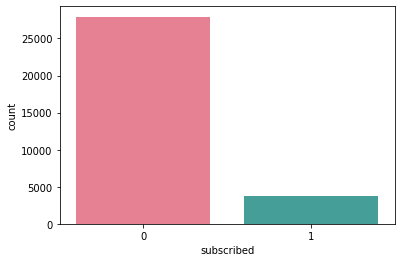

In [53]:
sns.countplot(x='subscribed',data=df,palette='husl')

In [54]:
BarPlot_columns=['loan','balance','default','job']

In [59]:
#Method the perform Bar plots
def Bar_plots(var):
    col=pd.crosstab(df_train[var],df_train.Subscribed)
    col.div(col.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,4))
    plt.xticks(rotation=90)

In [60]:
for col in BarPlot_columns:
    Bar_plots(col)

AttributeError: 'DataFrame' object has no attribute 'Subscribed'

In [61]:
#sb.distplot(hr_data['Age'])

In [62]:
count_no_subscribed=len(df[df['subscribed']==0])
count_subscribed=len(df[df['subscribed']==1])
pct_no_subscribed=(count_no_subscribed/(count_no_subscribed+count_subscribed))*100
pct_subscribed=(count_subscribed/(count_no_subscribed+count_subscribed))*100
print("percentage of no subscription is ",pct_no_subscribed)
print("percentage of subscription ",pct_subscribed)

percentage of no subscription is  88.26113059689702
percentage of subscription  11.73886940310298


Here our dependent variable classes are imbalanced, and the ratio of no-subscription to subscription instances is 88:12. So we have to balance the classes.

In [63]:
X=df.drop(['ID','subscribed'],axis=1)
y=df['subscribed']

In [64]:
#pip install --upgrade scikit-learn

#### Perform SMOTE to balance the dependent variable classes

In [65]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [67]:
y_train

10594    0
975      0
12960    0
18382    0
23496    0
        ..
13123    0
19648    0
9845     0
10799    0
2732     0
Name: subscribed, Length: 22152, dtype: int32

In [68]:
# Fit the SMOTE
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_resample(X_train, y_train)

In [69]:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['subscribed'])

In [70]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['subscribed']==0]))
print("Number of subscription",len(os_data_y[os_data_y['subscribed']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['subscribed']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['subscribed']==1])/len(os_data_X))

length of oversampled data is  39160
Number of no subscription in oversampled data 19580
Number of subscription 19580
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


#### Feature selection using RFE

In [71]:
df.columns.values

array(['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'subscribed', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [72]:
data_final_vars=df.columns.values.tolist()
y=['subscribed']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

rfe=RFE(logreg,20)
rfe=rfe.fit(os_data_X,os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\TANVI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\TANVI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\TANVI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increa

C:\Users\TANVI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\TANVI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

[False False False False False False False  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True False False  True  True False False False False False False
 False False False False False False False False False False False False
 False False False]
[28 32 30 29 26 31 27  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1
  1  1 25 24  1  1  4  3  7  6  5 17 12 19 15 11 14 18 22 16 13 20 21  9
 10 23  8]


The RFE has helped us to select the following features:'previous', 'subscribed', 'job_admin.', 'job_blue-collar','job_entrepreneur', 'job_housemaid', 'job_management','job_retired', 'job_self-employed', 'job_services', 'job_student','job_technician', 'job_unemployed', 'job_unknown','marital_divorced', 'marital_married', 'marital_single','education_primary', 'education_secondary', 'default_no', 'default_yes'

In [73]:
cols=['previous','job_admin.', 'job_blue-collar','job_entrepreneur', 'job_housemaid', 'job_management','job_retired', 'job_self-employed', 'job_services', 'job_student','job_technician', 'job_unemployed', 'job_unknown','marital_divorced', 'marital_married', 'marital_single','education_primary', 'education_secondary', 'default_no', 'default_yes']
X=os_data_X[cols]
y=os_data_y['subscribed']


In [74]:
X.shape

(39160, 20)

In [75]:
X.head()

,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,default_no,default_yes
0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0
1,7,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [76]:
y.shape

(39160,)

#### Implementing the model

In [77]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.275142
         Iterations 10
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.603     
Dependent Variable:  subscribed        AIC:               21589.1233
Date:                2021-05-15 15:07  BIC:               21760.6315
No. Observations:    39160             Log-Likelihood:    -10775.   
Df Model:            19                LL-Null:           -27144.   
Df Residuals:        39140             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      10.0000                                        
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
previous             0.1271   0.0083  15.3688 0.0000  0.1109  0.1433
job_admin.          -6.0531

##### The p-values for all of the variables are smaller than 0.05. Hence we can consider these variables for our model.

In [78]:
# Final Columns for model building
X.columns.values

array(['previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'default_no',
       'default_yes'], dtype=object)

In [79]:
# Select Variables in test data
col_list=['previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'default_no',
       'default_yes']
df1_test_final=df1_test[col_list]
df1_test_final.head()

,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,default_no,default_yes
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0


In [80]:
df1_test_final.shape

(13564, 20)

#### Split our data for training, validation and testing

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=21)
X_test=df1_test_final

#### Shapes of the datasets

In [82]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape,X_test.shape

((27412, 20), (11748, 20), (27412,), (11748,), (13564, 20))

####  Building a logistic regression model

In [83]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [84]:
logreg.fit(X_train,y_train)

C:\Users\TANVI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

#### Validate the Logistic Regression model

In [85]:
y_log_pred=logreg.predict(X_val)

In [86]:
from sklearn import metrics

print('Accuracy of logistic regression classifier on validation set:')
print(metrics.accuracy_score(y_val,y_log_pred))

Accuracy of logistic regression classifier on validation set:
0.9015151515151515


In [87]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_val,y_log_pred))

[[5756   59]
 [1098 4835]]


In [88]:
print(classification_report(y_val,y_log_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      5815
           1       0.99      0.81      0.89      5933

    accuracy                           0.90     11748
   macro avg       0.91      0.90      0.90     11748
weighted avg       0.91      0.90      0.90     11748



#### ROC Curve

In [89]:
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#logit_roc_auc = roc_auc_score(y_val, logreg.predict(X_val))
#fpr, tpr, thresholds = roc_curve(y_val, logreg.predict_proba(X_val)[:,1])
#plt.figure(figsize=(12,8))
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
#plt.show()

#### Predicting the test dataset

In [90]:
y_pred_final=logreg.predict(X_test)

In [91]:
y_pred_final = pd.DataFrame(y_pred_final, columns = ['Subscribed_Predicted'])

In [92]:
y_pred_final.head()

,Subscribed_Predicted
0,0
1,0
2,0
3,0
4,0


In [93]:
pred_data=pd.concat([df_test,y_pred_final],axis=1)

In [94]:
pred_data['Subscribed_Predicted']=pred_data['Subscribed_Predicted'].replace({0: 'no', 1: 'yes'})

In [95]:
pred_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed_Predicted
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown,no
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown,no
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown,no
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown,no
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown,no


In [96]:
pred_data['Subscribed_Predicted'].value_counts()

no     13367
yes      197
Name: Subscribed_Predicted, dtype: int64

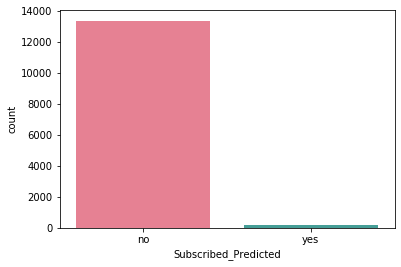

In [97]:
sns.countplot(x='Subscribed_Predicted',data=pred_data,palette='husl')

#### Export Result

In [98]:
pred_data.to_csv("Term deposit prediction.csv")